# Homework - perform multiple linear regression on the
`FuelConsumption.csv data`
* use follwing features: `['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'`
* make a two 2D plot of ENGINESIZE vs CO2EMISSIONS and CYLINDERS vs CO2EMISSIONS
* make a 3D plot of ENGINESIZE and CYLINDERS vs CO2EMISSIONS
* apply feature scaling (be able to swith it off and on) (commented or not commented)
* split the data into X_train/y_train and X_test/y_test (80%-20%)
  using `from sklearn.model_selection import train_test_split`
* train the model using X_train data
* evaluate the fit (R-Squared)
* print the metrics MAE, MAPE
* predict CO2 emission of the 10 randomly chosen cars, compare with the true values
* compare results with the simple single feature regression
* write short comments on each step

# Load python libraries

In [319]:
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data into Pandas</h2>

In [320]:
df= pd.read_csv("https://raw.githubusercontent.com/mhemmg/NeuralNetworkRSouzaCourse/master/Notebooks/extras/classes_MH/class_08/FuelConsumption.csv")
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Let's select some features that we want to use for regression.


In [321]:
df_multiple = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',"CO2EMISSIONS"] ]
df_multiple.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


Let's plot Emission values with respect to Engine size:


<h2 id="reading_data">Visualize the data in 2D</h2>

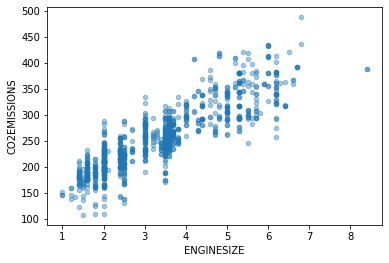

In [322]:
df.plot(kind="scatter", y = "CO2EMISSIONS", x = "ENGINESIZE", alpha = 0.4)

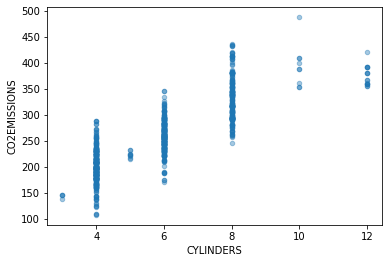

In [323]:
df.plot(kind="scatter", y = "CO2EMISSIONS", x = "CYLINDERS", alpha = 0.4)

<h2 id="reading_data">Visualize the data in 3D</h2>

<Figure size 432x288 with 0 Axes>

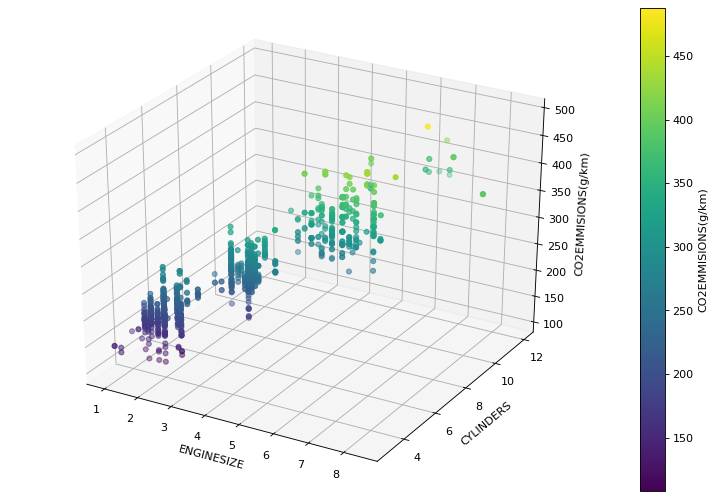

In [324]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import DataFrame
fig = plt.figure()
fig = plt.figure(figsize = (12, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')
pnt3d = ax.scatter3D(df['ENGINESIZE'],df['CYLINDERS'], df['CO2EMISSIONS'],c=df['CO2EMISSIONS'])
cbar=plt.colorbar(pnt3d)
cbar.set_label("CO2EMMISIONS(g/km)")
fig.set_facecolor('white')
ax.set_facecolor('white')
#plt.xticks(np.arange(2018, 2021, 1))
#plt.yticks(np.arange(1,3,1))
ax.set_xlabel("ENGINESIZE")
ax.set_ylabel('CYLINDERS')
ax.set_zlabel('CO2EMMISIONS(g/km)')
plt.show()

# Normalize the data by feature-scaling
* try to make in a way that you can turn it on and off
* if you comment the feature scaling the program should still work

In [325]:
X=df_multiple.loc[:, df_multiple.columns.drop('CO2EMISSIONS')]
y= df_multiple[["CO2EMISSIONS"]] #.values 
X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
0,2.0,4,9.9,6.7,8.5
1,2.4,4,11.2,7.7,9.6
2,1.5,4,6.0,5.8,5.9
3,3.5,6,12.7,9.1,11.1
4,3.5,6,12.1,8.7,10.6


In [326]:
#from sklearn.preprocessing import  Normalizer
from sklearn.preprocessing import  MinMaxScaler


#Normalize X
#X = X.values #returns a numpy array
#min_max_scaler = MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(X)
#X= pd.DataFrame(x_scaled)

In [327]:

#Normalize y
#y = y.values #returns a numpy array
#min_max_scaler = MinMaxScaler()
#y_scaled = min_max_scaler.fit_transform(y)
#y= pd.DataFrame(y_scaled)

# Split the data into train and test using scikit-learn

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

In [328]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


<h2 id="multiple_regression_model">Train the model using X_train and y_train sets using scikit-learn</h2>


In [329]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

print('R2_train: ', LR.score(X_train, y_train))
print('R2_test: ', LR.score(X_test, y_test))


R2_train:  0.8606754712260789
R2_test:  0.8763308442525605


In [330]:
# Predicción con los valores de X_test 
y_pred =  LR.predict(X_test.values)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


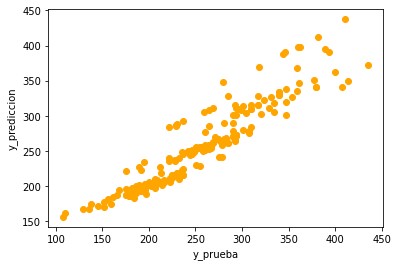

In [331]:
# It's not possible visualize a 6d plot so we plot y_test vs y_pred  
plt.scatter(y_test,y_pred,color='orange')

plt.xlabel('y_prueba')
plt.ylabel('y_prediccion')
plt.show()


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="prediction">Evaluate R2</h2>

<h2 id="prediction">Prediction C02 emission from ten random cars</h2>

In [332]:
# Generando números aleatorios 
num_samples = X.shape[0]

rand_idx = np.random.randint(0,num_samples,10)



In [333]:

X= X.to_numpy()


In [334]:
# Evaluando los números aleatorios en  
X_random= X[rand_idx]
LR.predict(X_random)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[226.62257145],
       [224.3765334 ],
       [239.45808218],
       [298.00171145],
       [313.2344332 ],
       [236.93815597],
       [301.29857126],
       [259.00007979],
       [264.23124744],
       [366.61497147]])

<h2 id="prediction">Print the metrics</h2>

* MAE    
* MAPE    
* R-squared    

In [335]:
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MAPE: ', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE too 
print('R2: ', LR.score(X_test,y_test))



MAE:  16.689747234417517
MAPE:  0.06982525288264176
RMSE:  22.61338583069822
R2:  0.8763308442525605
